In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import json
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from utils import compute_ece, process_train_metrics, plot_stepsize_schedule, process_eval_metrics, finalize_loss_acc_plots, plot_mi_matrices, plot_entropy_ecdfs, compare_interpolation_accuracies, plot_weight_projection, evaluate_metrics


=== SGHMC ===
CIFAR-10 Accuracy: 0.9495 ± 0.0000
CIFAR-10 NLL:      0.1756 ± 0.0000
CIFAR-10 ECE:      3.7751 ± 0.0000

stl10:
  AUROC:           0.675 ± 0.000
  Accuracy:        0.4934 ± 0.0000
  NLL:             3.1753 ± 0.0000


# Ablation on $\alpha$ and $d\tau$
## Questions to answer:
### 1) How does it affect stepsize distributions?
### 2) How does it affect metrics?

### Fix dtau=0.01 and vary alpha

SA-SGLD_a0.5 CIFAR-10: Acc=0.9475, NLL=0.1898
SA-SGLD_a5 CIFAR-10: Acc=0.9488, NLL=0.1872
SA-SGLD_a50 CIFAR-10: Acc=0.9488, NLL=0.1959
SA-SGLD_a500 CIFAR-10: Acc=0.9515, NLL=0.2100
SA-SGLD_a0.5 ECE: 0.0475
SA-SGLD_a5 ECE: 0.0451
SA-SGLD_a50 ECE: 0.0615
SA-SGLD_a500 ECE: 0.0794


/tmp/ipykernel_1341335/96067084.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


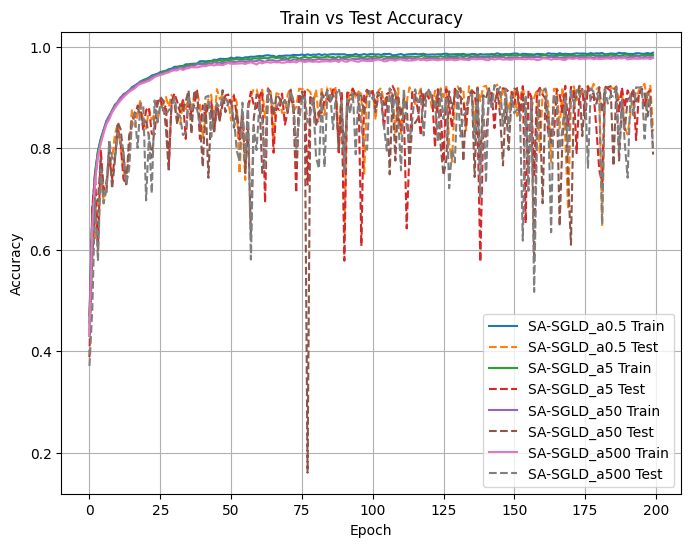

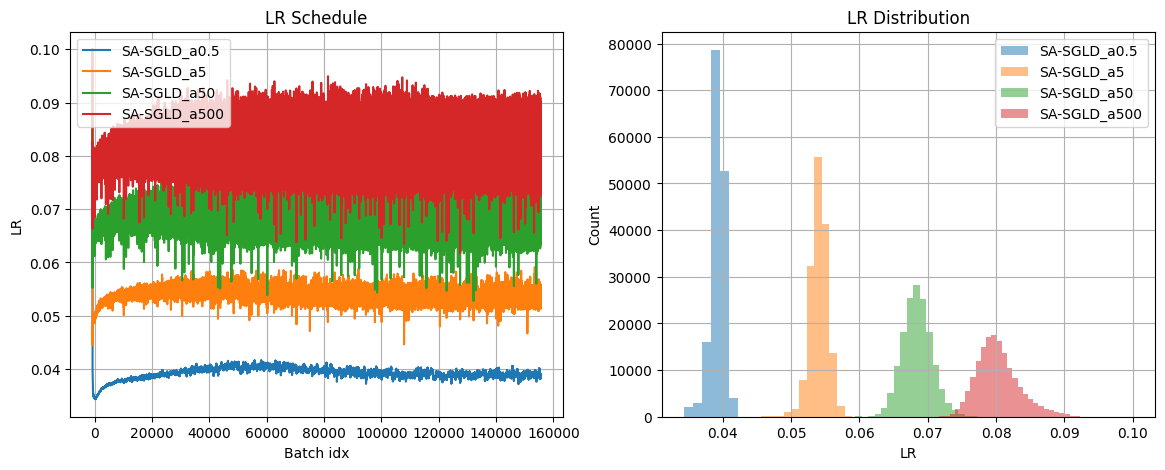

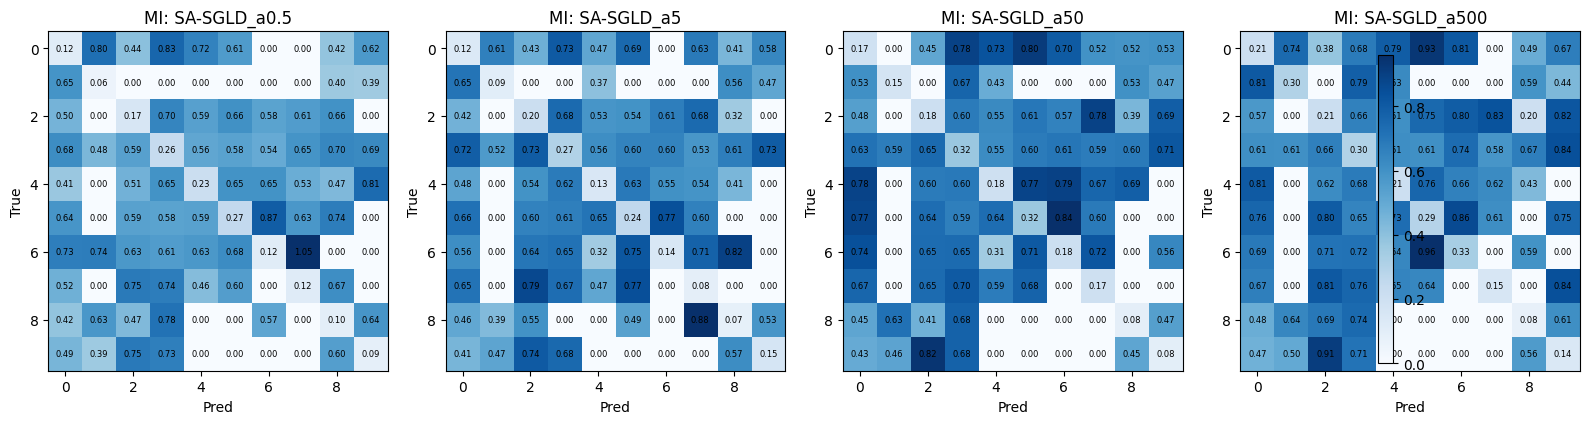

In [4]:
dirs = {
        "SA-SGLD_a0.5":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a0.5_m0.1_M10.0_r0.25",
    "SA-SGLD_a5":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a5.0_m0.1_M10.0_r0.25",
    "SA-SGLD_a50":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a50.0_m0.1_M10.0_r0.25",
    "SA-SGLD_a500": "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a500.0_m0.1_M10.0_r0.25"
        }
evaluate_and_plot(dirs)

### Fix alpha=50 and vary dtau

SA-SGLD_dt0.001 CIFAR-10: Acc=0.9394, NLL=0.1901
SA-SGLD_dt0.01 CIFAR-10: Acc=0.9488, NLL=0.1959
SA-SGLD_dt0.02 CIFAR-10: Acc=0.9477, NLL=0.2416
SA-SGLD_dt0.1 CIFAR-10: Acc=0.9046, NLL=0.5565
SA-SGLD_dt0.1 stl10: AUROC=0.638, Acc=0.4546, NLL=2.3059
SA-SGLD_dt0.001 ECE: 0.0126
SA-SGLD_dt0.01 ECE: 0.0615
SA-SGLD_dt0.02 ECE: 0.1028
SA-SGLD_dt0.1 ECE: 0.2604


/tmp/ipykernel_742443/4229271055.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


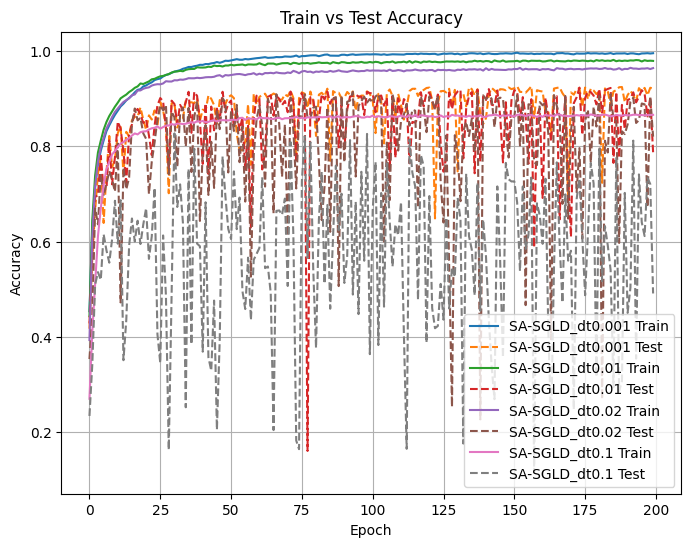

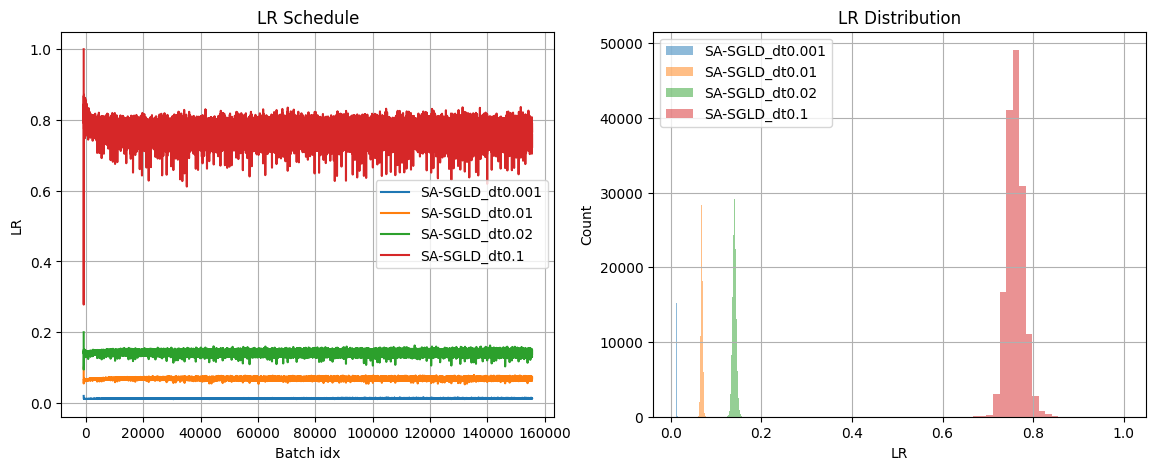

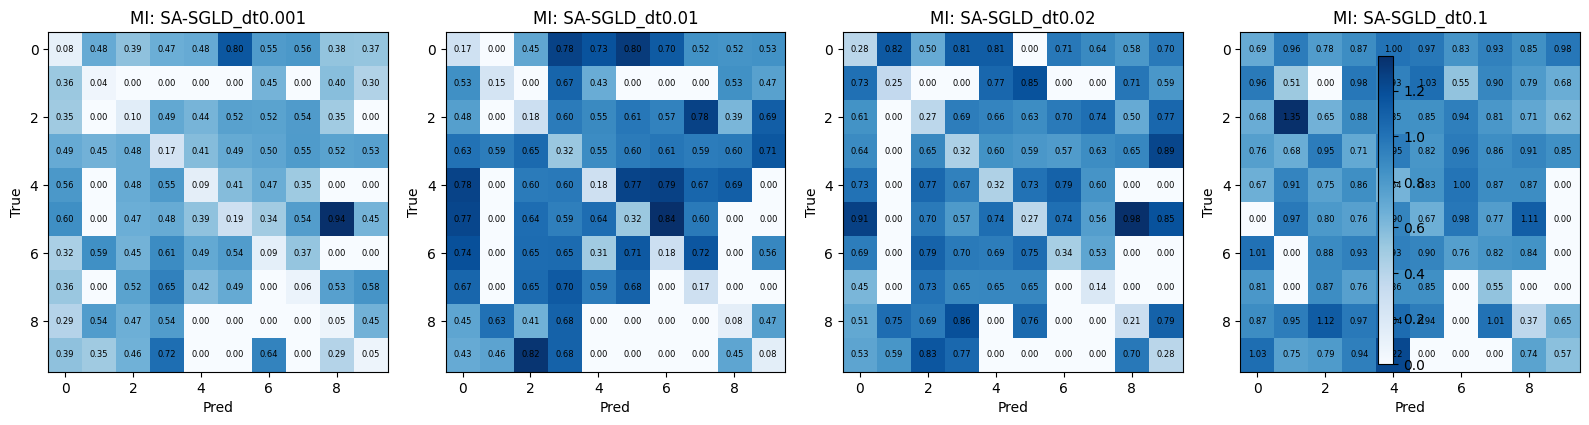

In [20]:
dirs = {
    "SA-SGLD_dt0.001":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.001_a50.0_m0.1_M10.0_r0.25",
    "SA-SGLD_dt0.001":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.002_a50.0_m0.1_M10.0_r0.25",
    "SA-SGLD_dt0.01":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a50.0_m0.1_M10.0_r0.25",
    "SA-SGLD_dt0.02":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.02_a50.0_m0.1_M10.0_r0.25",
    "SA-SGLD_dt0.1":
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.1_a50.0_m0.1_M10.0_r0.25",
        }
evaluate_and_plot(dirs)

### Vary alpha * dtau. Confirm that the same product for different alphas and dtaus lead to the same result.
### {0.1 * 5, 0.01 * 50, 0.001 * 500}
### {0.01 * 500, 0.001 * 50}
### Vary it in the range [0.01 * 50, 0.01 * 500, 0.01 * 1000]

# Ablation on $\zeta(0)$
## Questions to answer:
### 1) Does it affect stepsize distributions?
### 2) How does it affect metrics?

In [12]:
model_runs = {
    "SA-SGLD_zetaF": [
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a50.0_m0.1_M10.0_r0.25"
    ],
    "SA-SGLD_zeta0": [
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a50.0_m0.1_M10.0_r0.25_zeta0",

    ]
}

evaluate_metrics(
    model_runs=model_runs,
    
    ood_dataset_name='stl10'
)


=== SA-SGLD_zetaF ===
CIFAR-10 Accuracy: 0.9488 ± 0.0000
CIFAR-10 NLL:      0.1959 ± 0.0000
CIFAR-10 ECE:      0.0615 ± 0.0000

stl10:
  AUROC:           0.665 ± 0.000
  Accuracy:        0.4898 ± 0.0000
  NLL:             3.0262 ± 0.0000

=== SA-SGLD_zeta0 ===
CIFAR-10 Accuracy: 0.9510 ± 0.0000
CIFAR-10 NLL:      0.1840 ± 0.0000
CIFAR-10 ECE:      0.0525 ± 0.0000

stl10:
  AUROC:           0.685 ± 0.000
  Accuracy:        0.4856 ± 0.0000
  NLL:             3.0915 ± 0.0000


In [ ]:
dirs = {
        'sa-sgld_z0': 'cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a50.0_m0.1_M10.0_r0.25_zeta0',
        'sa-sgld_zF': 'cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a50.0_m0.1_M10.0_r0.25'
        }
evaluate_and_plot(dirs)

# Comparison against Cyclical SGMCMC
### Note: Use an ensemble size of 12. Plot MDS of samples. Plot interpolation NLL of samples.

In [9]:
model_runs = {
    "cSGLD": [
        "cifar/ckpt_sgld/csgld/S1",
        "cifar/ckpt_sgld/csgld/S3",
        "cifar/ckpt_sgld/csgld/S4",
        "cifar/ckpt_sgld/csgld/S5"
    ],
    "SA-cSGLD": [
        "cifar/ckpt_sgld/sa-csgld/S1/a500.0_m0.1_M10.0_r0.25"
    ],
}
evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=12
)


=== cSGLD ===
CIFAR-10 Accuracy: 0.9564 ± 0.0011
CIFAR-10 NLL:      0.2271 ± 0.0393
CIFAR-10 ECE:      0.0811 ± 0.0331

stl10:
  AUROC:           0.655 ± 0.010
  Accuracy:        0.4941 ± 0.0043
  NLL:             3.5902 ± 0.3738

=== SA-cSGLD ===
CIFAR-10 Accuracy: 0.9574 ± 0.0000
CIFAR-10 NLL:      0.1395 ± 0.0000
CIFAR-10 ECE:      0.0020 ± 0.0000

stl10:
  AUROC:           0.684 ± 0.000
  Accuracy:        0.4976 ± 0.0000
  NLL:             3.9153 ± 0.0000


In [3]:
model_runs = {
    "cSGLD": [
        "cifar/ckpt_sgld/csgld/S1",
        "cifar/ckpt_sgld/csgld/S3",
        "cifar/ckpt_sgld/csgld/S4",
        "cifar/ckpt_sgld/csgld/S5"
    ],
    "cSGLD (0.4)": [
        "cifar/ckpt_sgld/csgld/0.41/S1/"
    ]
    ,
    "SA-cSGLD": [
        "cifar/ckpt_sgld/sa-csgld/S1/a5.0_m0.1_M10.0_r0.25"
    ]
}
evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=12
)


=== cSGLD ===
CIFAR-10 Accuracy: 0.9564 ± 0.0011
CIFAR-10 NLL:      0.2271 ± 0.0393
CIFAR-10 ECE:      0.0811 ± 0.0331

stl10:
  AUROC:           0.655 ± 0.010
  Accuracy:        0.4941 ± 0.0043
  NLL:             3.5902 ± 0.3738

=== cSGLD (0.4) ===
CIFAR-10 Accuracy: 0.9565 ± 0.0000
CIFAR-10 NLL:      0.1369 ± 0.0000
CIFAR-10 ECE:      0.0091 ± 0.0000

stl10:
  AUROC:           0.679 ± 0.000
  Accuracy:        0.4979 ± 0.0000
  NLL:             4.0190 ± 0.0000

=== SA-cSGLD ===
CIFAR-10 Accuracy: 0.9560 ± 0.0000
CIFAR-10 NLL:      0.1397 ± 0.0000
CIFAR-10 ECE:      0.0086 ± 0.0000

stl10:
  AUROC:           0.683 ± 0.000
  Accuracy:        0.4945 ± 0.0000
  NLL:             3.9631 ± 0.0000


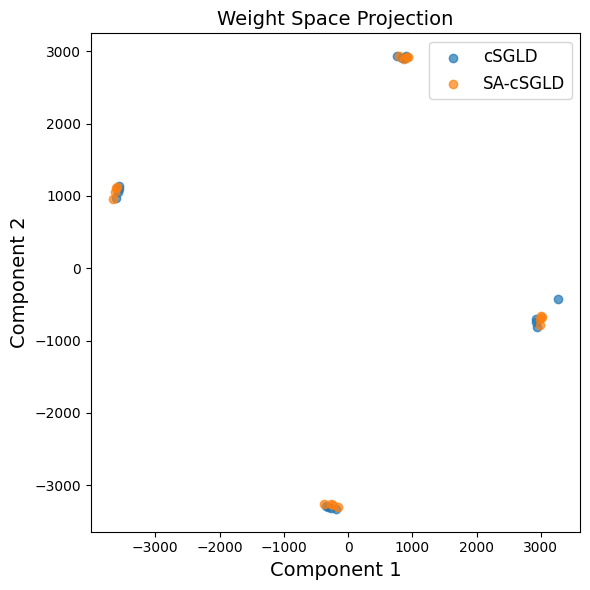

In [ ]:
model_dirs = {
    "cSGLD": ["cifar/ckpt_sgld/csgld/0.41/S1"],
    "SA-cSGLD": ["cifar/ckpt_sgld/sa-csgld/S1/a500.0_m0.1_M10.0_r0.25"]
}
plot_weight_projection(model_dirs)


Interpolating [cSGLD]: 100%|██████████| 16/16 [00:58<00:00,  3.66s/it]


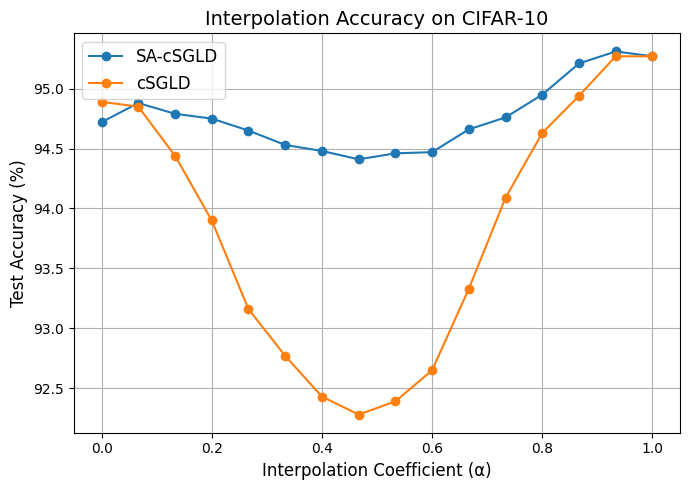

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import cifar.config as cf 

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cf.mean['cifar10'], cf.std['cifar10']),
])
testset = datasets.CIFAR10(root='cifar/data', train=False, download=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

model_pairs = {
    "SA-cSGLD": (
        "cifar/ckpt_sgld/sa-csgld/S1/a500.0_m0.1_M10.0_r0.25/7.pt",
        "cifar/ckpt_sgld/sa-csgld/S1/a500.0_m0.1_M10.0_r0.25/13.pt"
    ),
    "cSGLD": (
        "cifar/ckpt_sgld/csgld/0.41/S1/7.pt",
        "cifar/ckpt_sgld/csgld/0.41/S1/13.pt" # Change to 7 and 12 for regular cSGLD
    ),
}

compare_interpolation_accuracies(model_pairs, test_loader=testloader, device='cuda', steps=16)


SA-cSGLD CIFAR-10: Acc=0.9574, NLL=0.1395
cSGLD CIFAR-10: Acc=0.9576, NLL=0.2137
cSGLD (0.4) CIFAR-10: Acc=0.9565, NLL=0.1369
SA-cSGLD ECE: 0.0020
cSGLD ECE: 0.0725
cSGLD (0.4) ECE: 0.0091


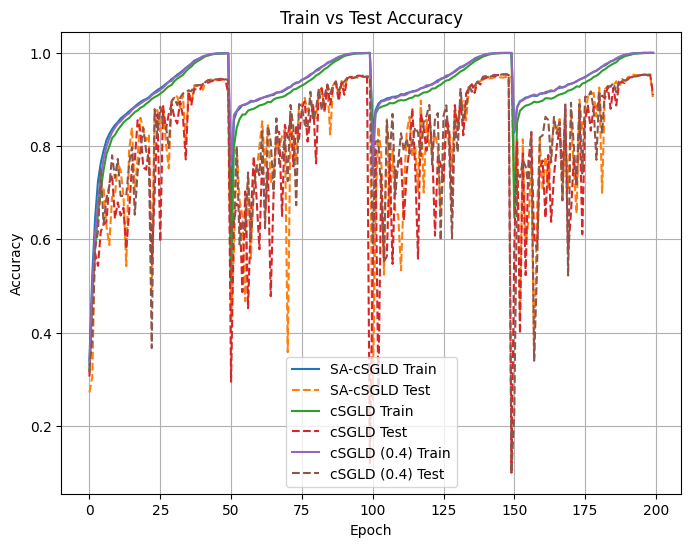

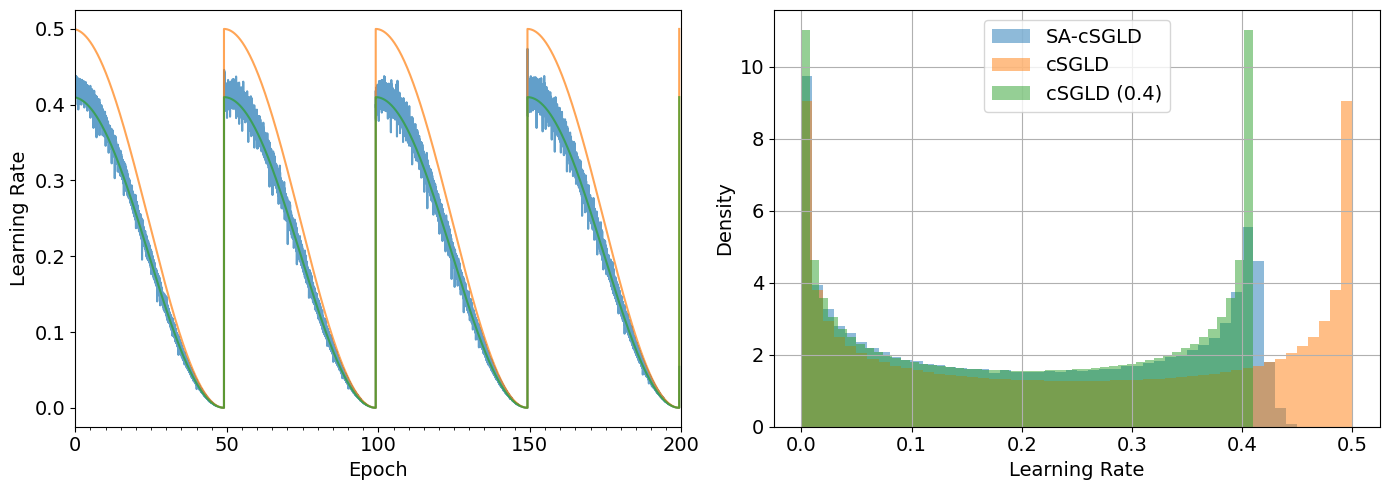

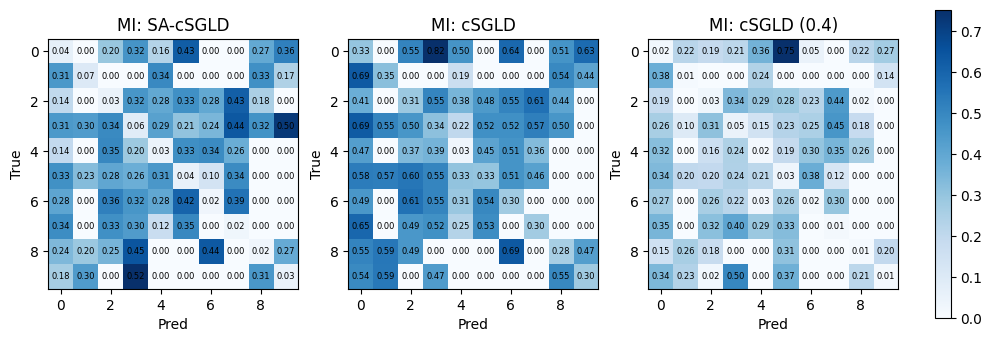

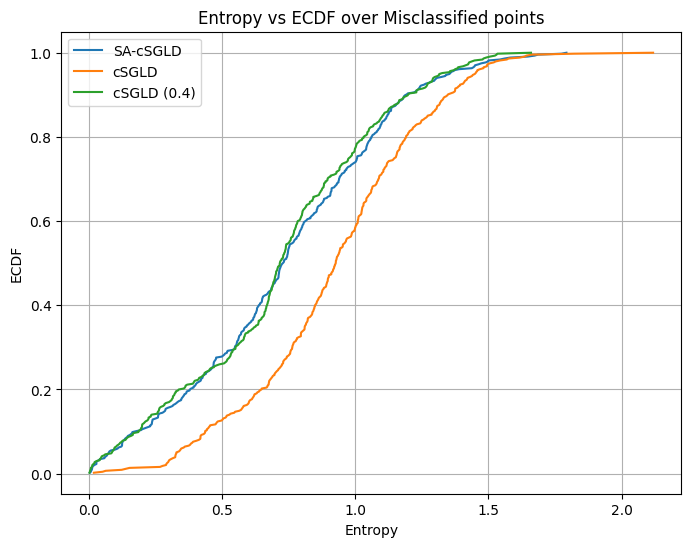

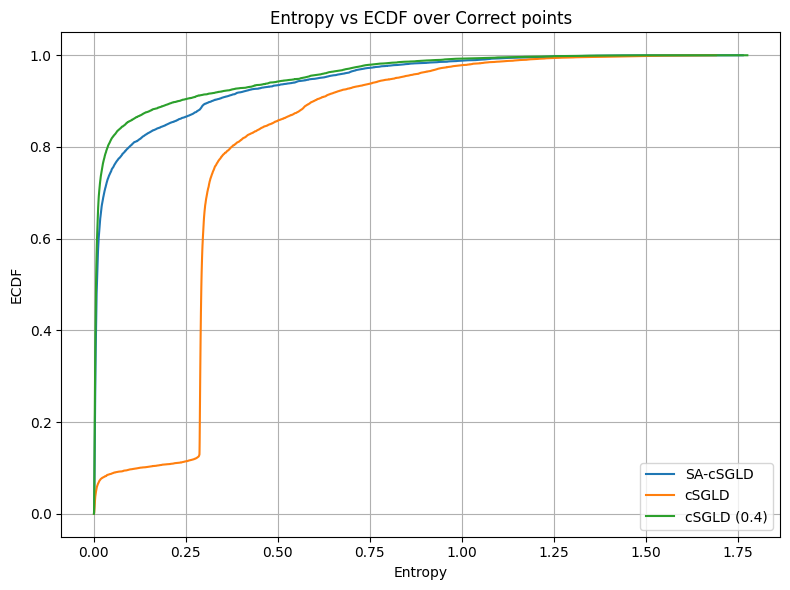

In [4]:
dirs = {
        "SA-cSGLD":
        "cifar/ckpt_sgld/sa-csgld/S1/a500.0_m0.1_M10.0_r0.25",
        "cSGLD": 
        "cifar/ckpt_sgld/csgld/S1",
        "cSGLD (0.4)":
        "cifar/ckpt_sgld/csgld/0.41/S1/"
        }
evaluate_and_plot(dirs, ensemble_size=12)

# Deep Ensemble training
### Note: SGD, SA-SGD, SA-SGLD, Deep Ensemble SA-SGD. Plot metrics as function of ensemble size.

In [8]:
model_runs = {
    "SA-SGLD": [
        "cifar/ckpt_sgld/sa-sgld/S1/lr0.01_a50.0_m0.1_M10.0_r0.25_zeta0"
    ]
}
evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=16
)

evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=8
)

evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=4
)

evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=2
)

evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=1
)


=== SA-SGLD ===
CIFAR-10 Accuracy: 0.9510 ± 0.0000
CIFAR-10 NLL:      0.1840 ± 0.0000
CIFAR-10 ECE:      0.0525 ± 0.0000

stl10:
  AUROC:           0.685 ± 0.000
  Accuracy:        0.4856 ± 0.0000
  NLL:             3.0915 ± 0.0000

=== SA-SGLD ===
CIFAR-10 Accuracy: 0.9467 ± 0.0000
CIFAR-10 NLL:      0.1975 ± 0.0000
CIFAR-10 ECE:      0.0511 ± 0.0000

stl10:
  AUROC:           0.689 ± 0.000
  Accuracy:        0.4818 ± 0.0000
  NLL:             3.1315 ± 0.0000

=== SA-SGLD ===
CIFAR-10 Accuracy: 0.9372 ± 0.0000
CIFAR-10 NLL:      0.2215 ± 0.0000
CIFAR-10 ECE:      0.0366 ± 0.0000

stl10:
  AUROC:           0.684 ± 0.000
  Accuracy:        0.4686 ± 0.0000
  NLL:             3.3649 ± 0.0000

=== SA-SGLD ===
CIFAR-10 Accuracy: 0.9081 ± 0.0000
CIFAR-10 NLL:      0.3165 ± 0.0000
CIFAR-10 ECE:      0.0293 ± 0.0000

stl10:
  AUROC:           0.675 ± 0.000
  Accuracy:        0.4397 ± 0.0000
  NLL:             3.6163 ± 0.0000

=== SA-SGLD ===
CIFAR-10 Accuracy: nan ± nan
CIFAR-10 NLL:      nan

/disk/homeDIRS/rrajpal/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/disk/homeDIRS/rrajpal/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/disk/homeDIRS/rrajpal/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/disk/homeDIRS/rrajpal/.local/lib/python3.10/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/disk/homeDIRS/rrajpal/.local/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# SGHMC

In [3]:
model_runs = {
    "SA-SGHMC": [
        "cifar/ckpt_sghmc/sa-sghmc/S1/lr0.01_a50.0_m0.1_M10.0_r0.25_zeta0",

    ],
    "SGHMC": [
        "cifar/ckpt_sghmc/sghmc/S1",

    ]
}

evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10'
)


=== SA-SGHMC ===
CIFAR-10 Accuracy: 0.9494 ± 0.0000
CIFAR-10 NLL:      0.1968 ± 0.0000
CIFAR-10 ECE:      0.0617 ± 0.0000

stl10:
  AUROC:           0.679 ± 0.000
  Accuracy:        0.4934 ± 0.0000
  NLL:             2.9522 ± 0.0000

=== SGHMC ===
CIFAR-10 Accuracy: 0.8974 ± 0.0000
CIFAR-10 NLL:      0.4538 ± 0.0000
CIFAR-10 ECE:      0.0642 ± 0.0000

stl10:
  AUROC:           0.651 ± 0.000
  Accuracy:        0.4525 ± 0.0000
  NLL:             5.8587 ± 0.0000


In [ ]:
model_runs = {
    "cSGHMC": [
        "cifar/ckpt_sghmc/csghmc/S1"
    ],
    "SA-cSGHMC": [
        "cifar/ckpt_sghmc/sa-csghmc/S1/a50.0_m0.1_M10.0_r0.25",

    ]}
evaluate_metrics(
    model_runs=model_runs,
    ood_dataset_name='stl10',
    ensemble_size=12
)


=== cSGHMC ===
CIFAR-10 Accuracy: 0.9576 ± 0.0000
CIFAR-10 NLL:      0.1441 ± 0.0000
CIFAR-10 ECE:      0.0128 ± 0.0000

stl10:
  AUROC:           0.667 ± 0.000
  Accuracy:        0.4990 ± 0.0000
  NLL:             3.8354 ± 0.0000

=== SA-cSGHMC ===
CIFAR-10 Accuracy: 0.9582 ± 0.0000
CIFAR-10 NLL:      0.2126 ± 0.0000
CIFAR-10 ECE:      0.0681 ± 0.0000

stl10:
  AUROC:           0.664 ± 0.000
  Accuracy:        0.4939 ± 0.0000
  NLL:             3.7183 ± 0.0000


SA-cSGHMC CIFAR-10: Acc=0.9582, NLL=0.2126
cSGHMC CIFAR-10: Acc=0.9576, NLL=0.1441
SA-cSGHMC ECE: 0.0681
cSGHMC ECE: 0.0128


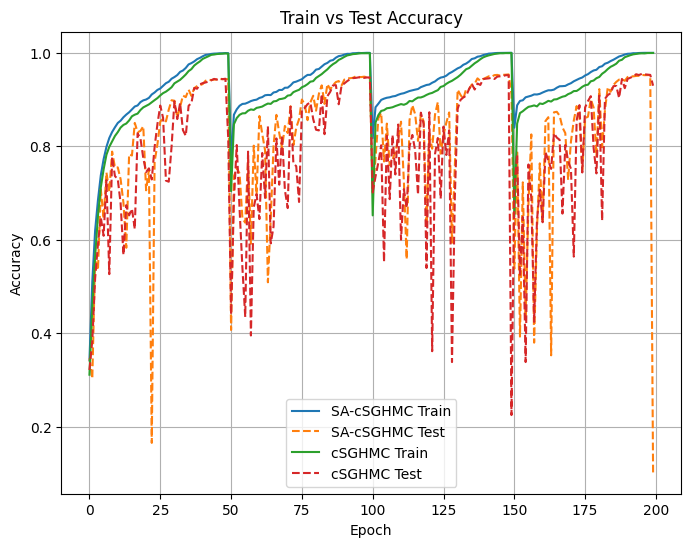

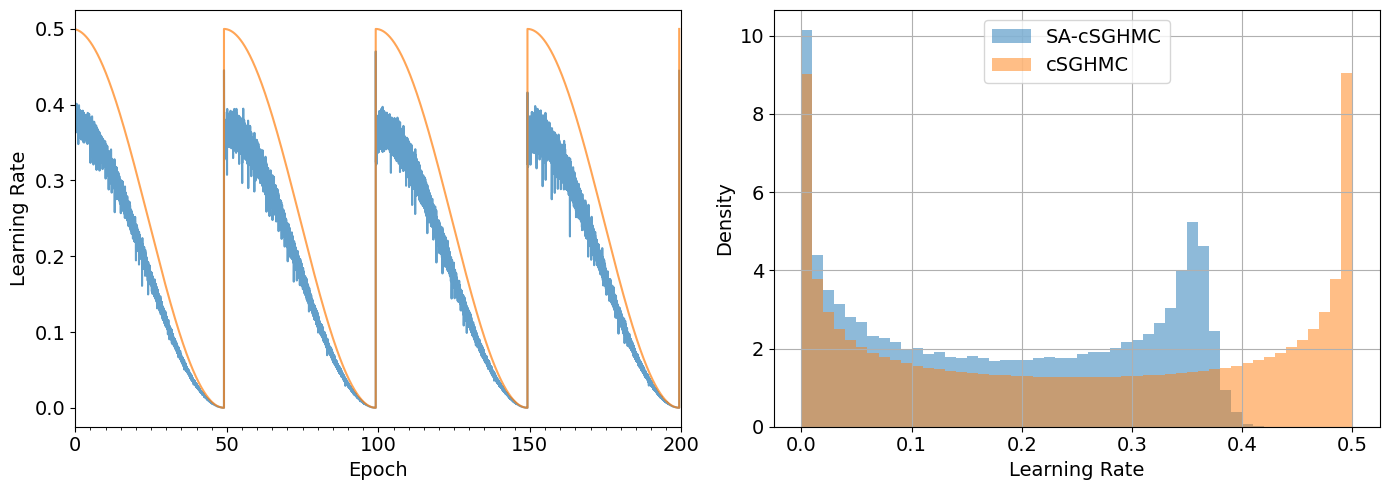

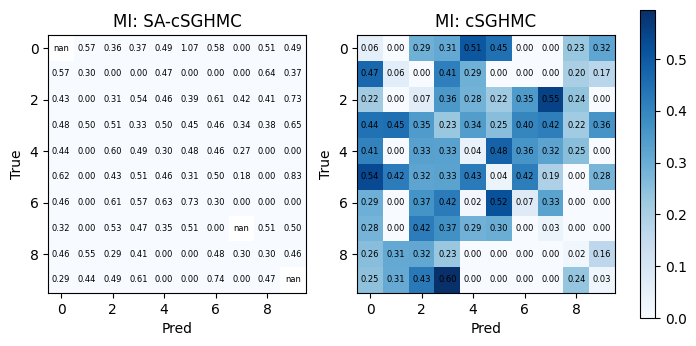

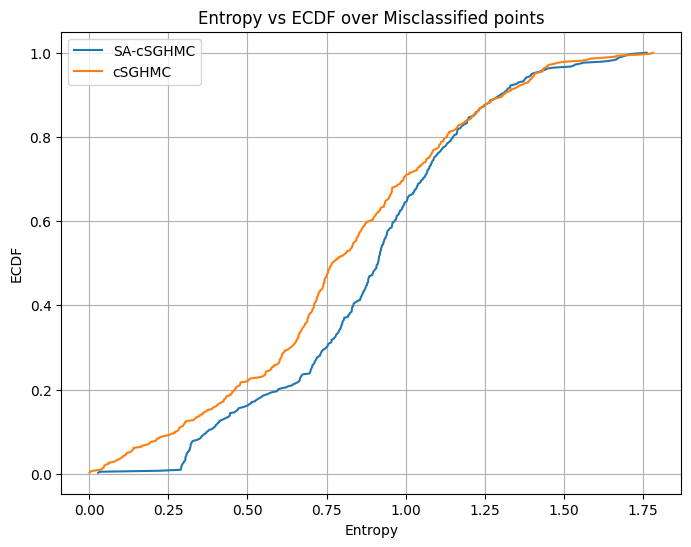

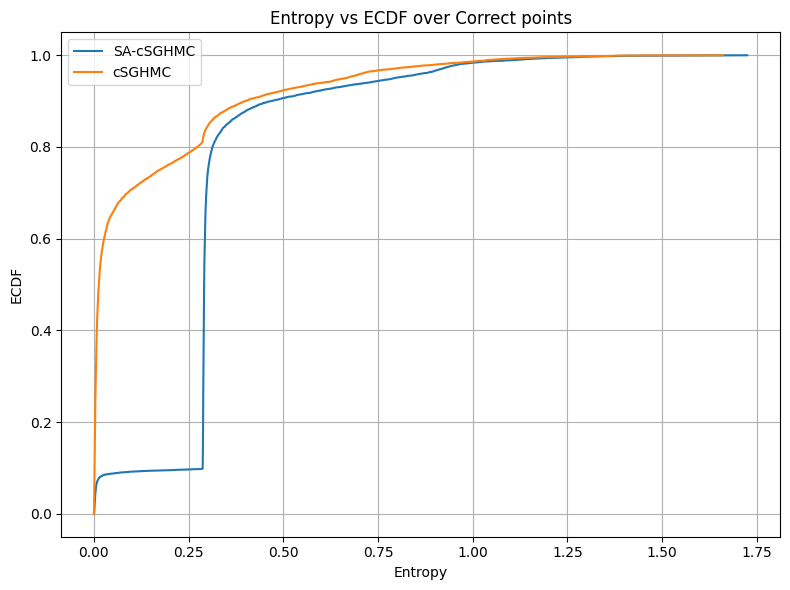

In [7]:
dirs = {
        "SA-cSGHMC":
        "cifar/ckpt_sghmc/sa-csghmc/S1/a50.0_m0.1_M10.0_r0.25",
        "cSGHMC": 
        "cifar/ckpt_sghmc/csghmc/S1"
        }
evaluate_and_plot(dirs, ensemble_size=12)